# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [ ]:

url='https://api.openweathermap.org/data/2.5/weather?units=Metric&lat=44.34&lon=10.99&appid=233bd14afe682b026a291a48dc4c53a8'
url

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = 'https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=233bd14afe682b026a291a48dc4c53a8'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sechura
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | lagos
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | cadale
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | puerto san carlos
City not fou

Processing Record 39 of Set 4 | dudinka
Processing Record 40 of Set 4 | orchard homes
Processing Record 41 of Set 4 | gokwe
Processing Record 42 of Set 4 | labrador city
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | twon-brass
Processing Record 45 of Set 4 | aoulef
Processing Record 46 of Set 4 | gamba
Processing Record 47 of Set 4 | st. john's
Processing Record 48 of Set 4 | jalpan
Processing Record 49 of Set 4 | afaahiti
Processing Record 0 of Set 5 | gadzhiyevo
Processing Record 1 of Set 5 | bamiantong
Processing Record 2 of Set 5 | conception bay south
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | crane
Processing Record 5 of Set 5 | hanko
Processing Record 6 of Set 5 | alcala del valle
Processing Record 7 of Set 5 | musay'id
City not found. Skipping...
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | caleta de carquin
Processing Record 10 of Set 5 | yellowknife
Processing Record 11 of Set 5 | muzo
Processing Rec

Processing Record 28 of Set 8 | bay city
Processing Record 29 of Set 8 | la paz
Processing Record 30 of Set 8 | ebermannstadt
Processing Record 31 of Set 8 | les avirons
Processing Record 32 of Set 8 | nurota
Processing Record 33 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 34 of Set 8 | turkmenbasy
Processing Record 35 of Set 8 | quelimane
Processing Record 36 of Set 8 | kirensk
Processing Record 37 of Set 8 | volodarskiy
Processing Record 38 of Set 8 | fale old settlement
Processing Record 39 of Set 8 | howard springs
Processing Record 40 of Set 8 | nadym
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | port alfred
Processing Record 43 of Set 8 | pavullo nel frignano
Processing Record 44 of Set 8 | bayanhongor
Processing Record 45 of Set 8 | oltinko'l
Processing Record 46 of Set 8 | menongue
Processing Record 47 of Set 8 | cidade velha
Processing Record 48 of Set 8 | labasa
Processing Record 49 of Set 8 | la ronge
Processing Record 

Processing Record 21 of Set 12 | itaituba
Processing Record 22 of Set 12 | totness
Processing Record 23 of Set 12 | sunne
Processing Record 24 of Set 12 | acapulco de juarez
Processing Record 25 of Set 12 | espargos
City not found. Skipping...
Processing Record 26 of Set 12 | betioky
Processing Record 27 of Set 12 | lamu
Processing Record 28 of Set 12 | argo
Processing Record 29 of Set 12 | caleta olivia
Processing Record 30 of Set 12 | pukchil-lodongjagu
Processing Record 31 of Set 12 | las terrenas
Processing Record 32 of Set 12 | prachuap khiri khan
Processing Record 33 of Set 12 | lazaro cardenas
Processing Record 34 of Set 12 | port pirie
Processing Record 35 of Set 12 | geraldton
Processing Record 36 of Set 12 | sao joao da barra
Processing Record 37 of Set 12 | susuman
Processing Record 38 of Set 12 | nova vicosa
Processing Record 39 of Set 12 | awjilah
Processing Record 40 of Set 12 | marsh harbour
Processing Record 41 of Set 12 | taro
-----------------------------
Data Retriev

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sechura,-5.5569,-80.8222,26.92,56,89,3.97,PE,1690395484
1,edinburgh of the seven seas,-37.0676,-12.3116,10.43,52,88,8.12,SH,1690395484
2,margaret river,-33.9500,115.0667,12.81,74,100,9.03,AU,1690395400
3,adamstown,-25.0660,-130.1015,19.93,72,81,8.81,PN,1690395485
4,blackmans bay,-43.0167,147.3167,9.83,83,100,2.50,AU,1690395415


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sechura,-5.5569,-80.8222,26.92,56,89,3.97,PE,1690395484
1,edinburgh of the seven seas,-37.0676,-12.3116,10.43,52,88,8.12,SH,1690395484
2,margaret river,-33.9500,115.0667,12.81,74,100,9.03,AU,1690395400
3,adamstown,-25.0660,-130.1015,19.93,72,81,8.81,PN,1690395485
4,blackmans bay,-43.0167,147.3167,9.83,83,100,2.50,AU,1690395415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

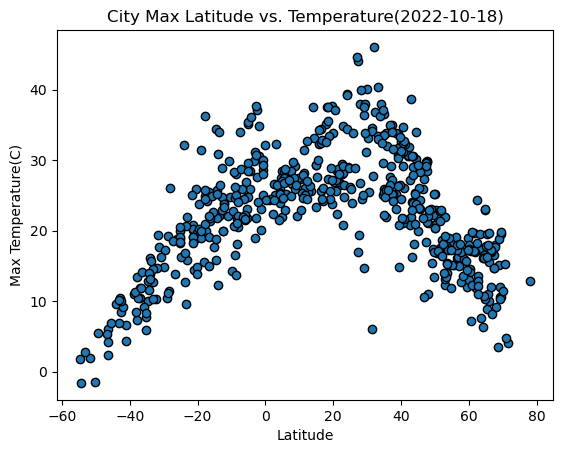

In [18]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y,edgecolor = "black",label = "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

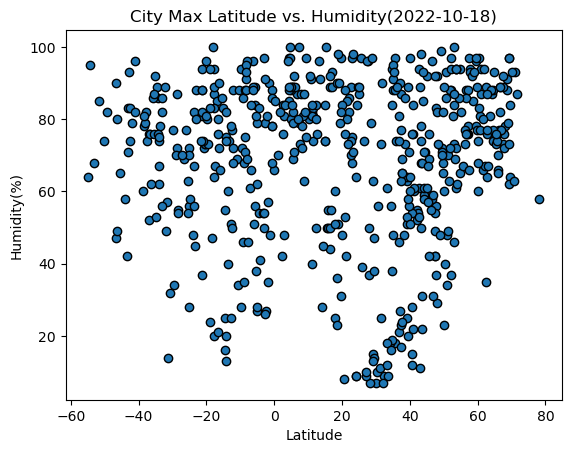

In [22]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y,edgecolor = "black",label = "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

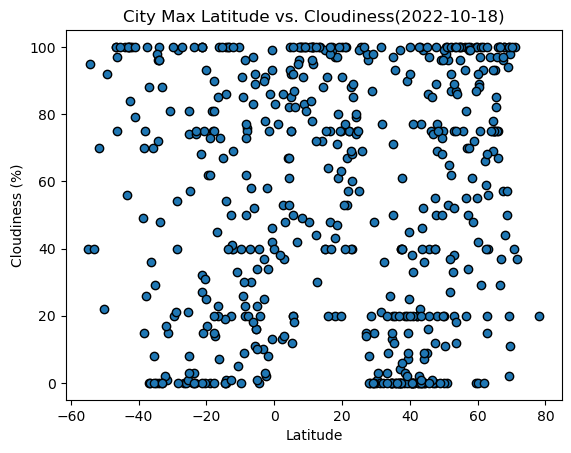

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y,edgecolor = "black",label = "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

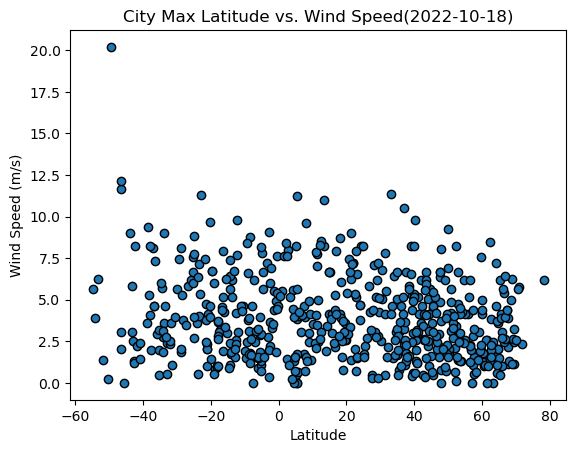

In [24]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y,edgecolor = "black",label = "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid=True

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,tazovsky,67.4667,78.7000,16.60,73,57,4.40,RU,1690395236
6,georgetown,5.4112,100.3354,27.96,89,20,0.00,MY,1690395238
7,tiksi,71.6872,128.8694,4.04,87,37,2.31,RU,1690395463
8,lihue,21.9789,-159.3672,26.77,82,75,7.20,US,1690395410
11,cabo san lucas,22.8909,-109.9124,34.78,68,40,5.14,MX,1690395360


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sechura,-5.5569,-80.8222,26.92,56,89,3.97,PE,1690395484
1,edinburgh of the seven seas,-37.0676,-12.3116,10.43,52,88,8.12,SH,1690395484
2,margaret river,-33.9500,115.0667,12.81,74,100,9.03,AU,1690395400
3,adamstown,-25.0660,-130.1015,19.93,72,81,8.81,PN,1690395485
4,blackmans bay,-43.0167,147.3167,9.83,83,100,2.50,AU,1690395415


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.381711929320937


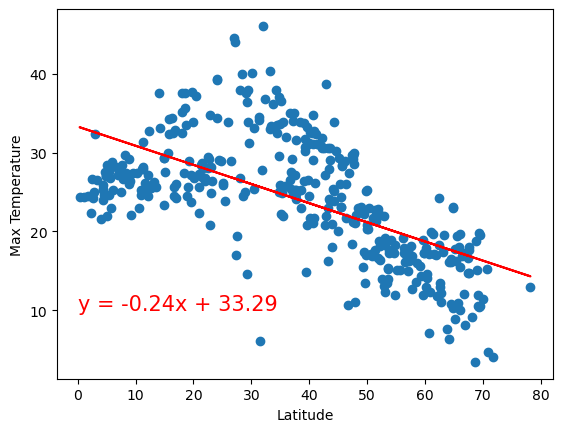

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temperature", (0,10))

The r-value is: 0.7108849041313893


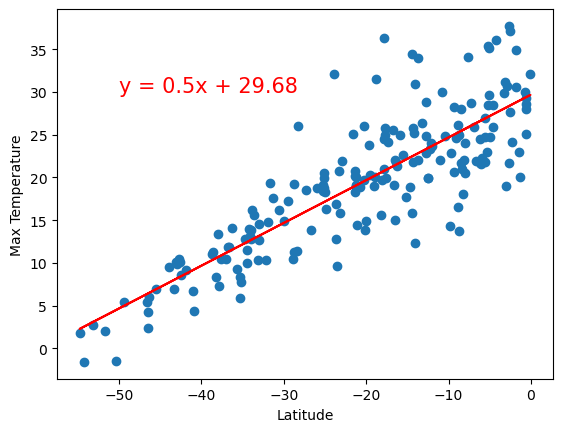

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temperature", (-50,30))

**Discussion about the linear relationship:** There is a linear relationship within the southern hemisphere but not with the northern hemisphere. The r-value is much higher in the southern hemisphere, giving the variables a stronger correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002812739521249139


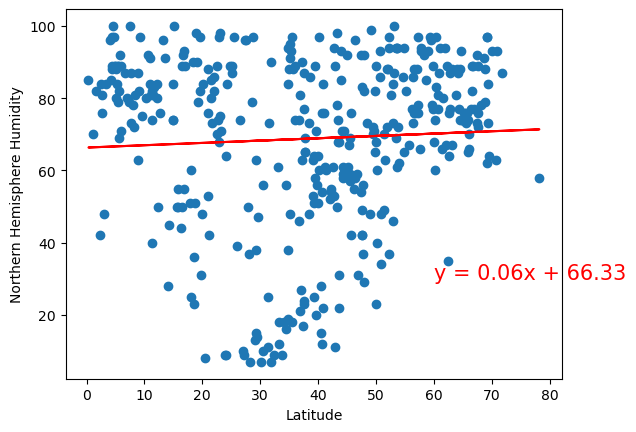

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Northern Hemisphere Humidity", (60,30))

The r-value is: 0.012396638797971808


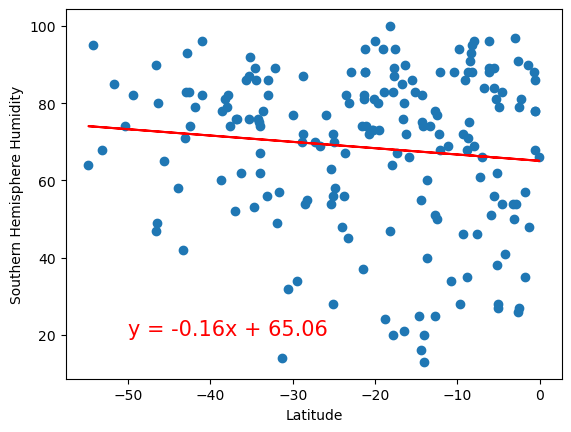

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Southern Hemisphere Humidity", (-50,20))

**Discussion about the linear relationship:** There is virtually no correlation between the humidity and latitude, seeing that the r value for both hemispheres is about 0.01.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0014762944385374307


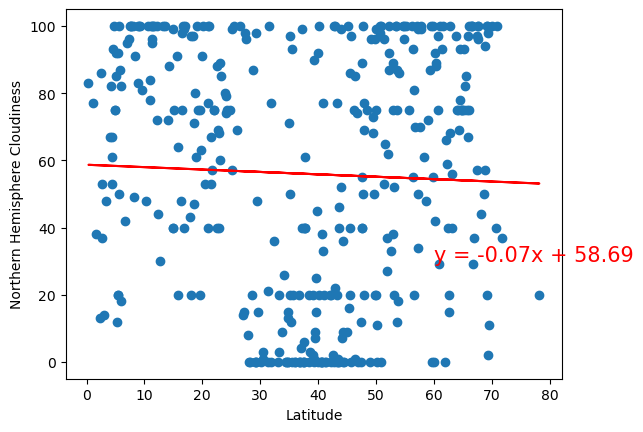

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Northern Hemisphere Cloudiness", (60,30))

The r-value is: 0.032388522222433686


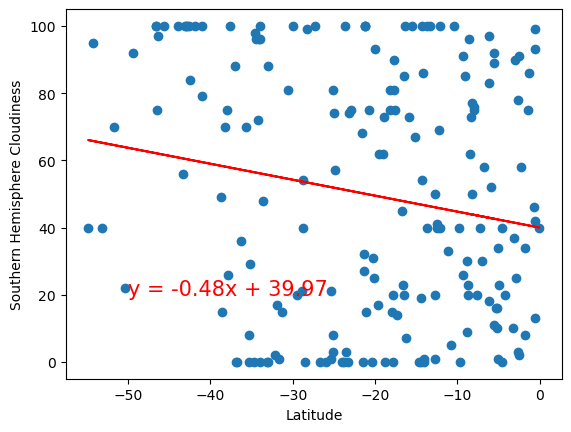

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Southern Hemisphere Cloudiness", (-50,20))

**Discussion about the linear relationship:** There is virtually no correlation between the cloudiness and latitude, seeing that the r value for both hemispheres is about 0.01.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.033980076253163266


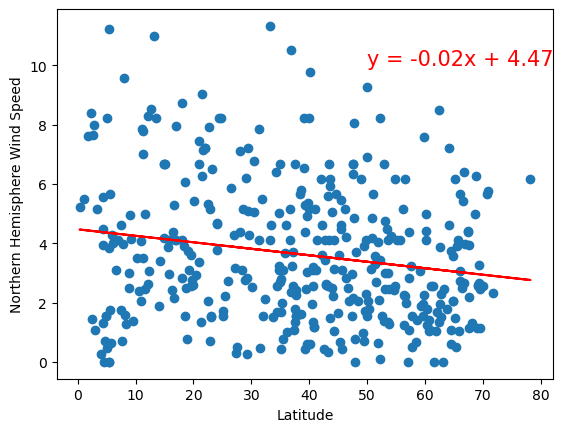

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Northern Hemisphere Wind Speed", (50, 10))

The r-value is: 0.016447503703976987


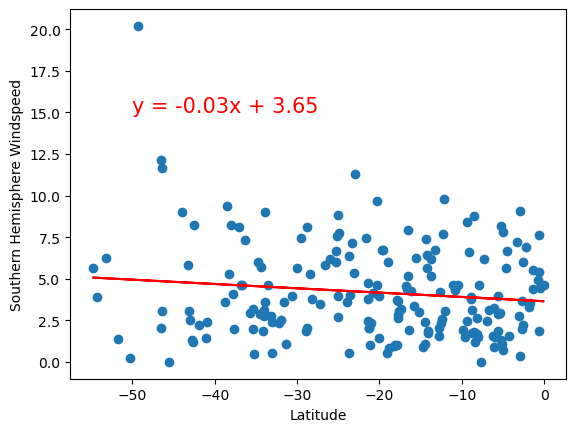

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Southern Hemisphere Windspeed", (-50,15))

**Discussion about the linear relationship:** The linear relationship here is also weak with an r value not passing 0.05 for either hemispheres.